## We use LLMs to understand the image using Vision Transformers (ViT) 

Among many usages of Vision Transformers we first do classification task.



In [ ]:
from PIL import Image
from io import BytesIO
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch
import matplotlib.pyplot as plt

/home/sajalpaudyal/Documents/Programming_Works/AI_agents_with_LLMs/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_file_loc = [
    "../images/apple.jpg",
    "../images/sparrow.jpg",
    "../images/sunset.jpg",
    "../images/test_monkey.jpg"
]

In [3]:
vit_model = "google/vit-base-patch16-224"
feature_extraction = ViTFeatureExtractor.from_pretrained(vit_model)
model = ViTForImageClassification.from_pretrained(vit_model)

/home/sajalpaudyal/Documents/Programming_Works/AI_agents_with_LLMs/lib64/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [6]:
images = []
for single_image in image_file_loc:
    image = Image.open(single_image).convert("RGB")
    images.append(image)


inputs = feature_extraction(images=images, return_tensors="pt")

In [7]:
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_ids = logits.argmax(-1).tolist()
    

In [9]:
labels = model.config.id2label

predicted_labels = [labels[class_id] for class_id in predicted_class_ids]

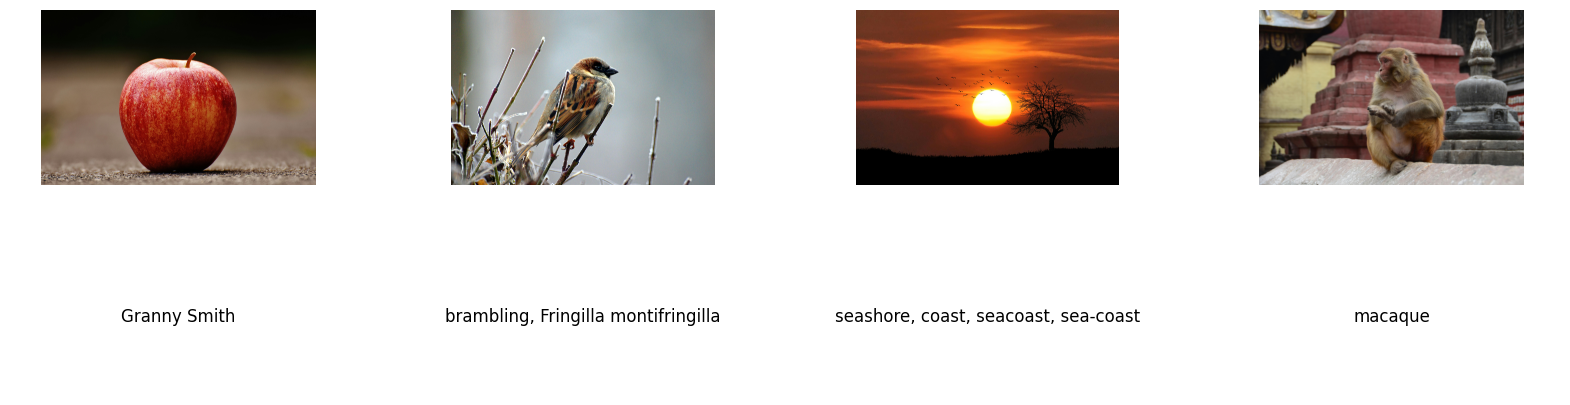

In [21]:
fig, axs = plt.subplots(2, len(images), figsize = (20,5))

for i, (image, label) in enumerate(zip(images, predicted_labels)):
    axs[0, i].imshow(image)
    axs[0, i].axis("off")
    axs[1, i].text(0.5, 0.5, label, horizontalalignment="center", verticalalignment="top", fontsize=12)
    axs[1,i].axis("off")
    
    
plt.show()